# Red Inicial


## Imports


In [1]:
from __future__ import annotations

from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from custom_env.actions import Action
from custom_env.router_env import RouterEnv
from custom_env.states import NormalState, AttackState
from custom_env.utils import Color, Location
from gymnasium import make
from gymnasium.utils.env_checker import check_env
from pandas import DataFrame, Series
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.logger import Logger, configure
from stable_baselines3.common.monitor import Monitor

Cargado a las 2025-06-08 17:23:02.466200


In [2]:
name = "./models/Example"
logs_path = "./logs/train/"
models_path = "./models/"
env_id = "RouterEnv-v0"

progress_bar = True
if progress_bar == True:
    import rich
    import tqdm

## Clases y Funciones


In [3]:
tiempo_global: float = 0.0
iteraciones = 0
# Decaorador auxiliar para poder medir el tiempo de las funciones


def medir_tiempo(activado=False):
    def fun(funcion):
        def wrapper(*args, **kwargs):
            if not activado:
                return funcion(*args, **kwargs)
            fun_tiempo = perf_counter
            inicio: float = fun_tiempo()
            resultado = funcion(*args, **kwargs)
            tiempo_total: float = fun_tiempo() - inicio
            global tiempo_global, iteraciones
            medida = 1e6
            t: float = tiempo_total*medida
            tiempo_global += t
            iteraciones += 1
            print(f"Tiempo de ejecución de {
                funcion.__name__}: {t:.2f} micro-segundos")
            return resultado
        return wrapper
    return fun


def calcular_stats_acciones(acciones):
    if isinstance(acciones[-1], int):
        acciones = [Action.int_to_action(a) for a in acciones]
    print(f"{Action.DENY.name}: {acciones.count(Action.DENY)/len(acciones):.2%}")
    print(f"{Action.ALLOW.name}: {acciones.count(Action.ALLOW)/len(acciones):.2%}")

## Entrenamiento


In [14]:
seed = 50
env: RouterEnv = make(env_id, seed=seed)
check_env(env)


env: RouterEnv = make(env_id, seed=seed)


print("Seed: ", env.get_seed())

new_logger: Logger = configure(logs_path, ["stdout", "csv"])
env = Monitor(env, logs_path)


model: PPO = PPO("MultiInputPolicy", env,
                 verbose=True,seed=seed)


model.set_logger(new_logger)
try:
    model.learn(total_timesteps=int(1e5//2),
                progress_bar=progress_bar)
except KeyboardInterrupt:
    print("Entrenamiento interrumpido")


g: str = input("¿Desea guardarlo? (s/n) ")
if g.lower() == "s":
    model.save(name)
    print("Modelo guardado")

Seed:  50
Logging to ./logs/train/


Output()

Using cpu device
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | 813      |
| time/              |          |
|    fps             | 394      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.2e+03     |
| time/                   |             |
|    fps                  | 342         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005085253 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.691      |
|    explained_variance   | 0.000226    |
|    learning_rate        | 0.0003      |
|    loss                 | 6.18e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.000727   |
|    value_loss           | 8.13e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.37e+03     |
| time/                   |              |
|    fps                  | 361          |
|    iterations           | 3            |
|    time_elapsed         | 16           |
|    total_timesteps      | 6144         |
| train/                  |              |
|    approx_kl            | 0.0052934755 |
|    clip_fraction        | 0.0476       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.679       |
|    explained_variance   | 0.0607       |
|    learning_rate        | 0.0003       |
|    loss                 | 2.17e+03     |
|    n_updates            | 20           |
|    policy_gradient_loss | -0.00528     |
|    value_loss           | 5.06e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.51e+03     |
| time/                   |              |
|    fps                  | 374          |
|    iterations           | 4            |
|    time_elapsed         | 21           |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0022572898 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.682       |
|    explained_variance   | 0.0656       |
|    learning_rate        | 0.0003       |
|    loss                 | 2.45e+03     |
|    n_updates            | 30           |
|    policy_gradient_loss | -0.000764    |
|    value_loss           | 5.32e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.62e+03    |
| time/                   |             |
|    fps                  | 390         |
|    iterations           | 5           |
|    time_elapsed         | 26          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.004144012 |
|    clip_fraction        | 0.0393      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.677      |
|    explained_variance   | 0.0599      |
|    learning_rate        | 0.0003      |
|    loss                 | 2.52e+03    |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00556    |
|    value_loss           | 5.88e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.59e+03     |
| time/                   |              |
|    fps                  | 393          |
|    iterations           | 6            |
|    time_elapsed         | 31           |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 0.0029825896 |
|    clip_fraction        | 0.016        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.662       |
|    explained_variance   | 0.0149       |
|    learning_rate        | 0.0003       |
|    loss                 | 2.78e+03     |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.0023      |
|    value_loss           | 6.33e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.5e+03     |
| time/                   |             |
|    fps                  | 379         |
|    iterations           | 7           |
|    time_elapsed         | 37          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 5.71617e-05 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.654      |
|    explained_variance   | 0.0261      |
|    learning_rate        | 0.0003      |
|    loss                 | 2.55e+03    |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.000236   |
|    value_loss           | 5.19e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.47e+03     |
| time/                   |              |
|    fps                  | 369          |
|    iterations           | 8            |
|    time_elapsed         | 44           |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0016106399 |
|    clip_fraction        | 0.0196       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.66        |
|    explained_variance   | 0.301        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.4e+03      |
|    n_updates            | 70           |
|    policy_gradient_loss | -0.00159     |
|    value_loss           | 9.29e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.43e+03     |
| time/                   |              |
|    fps                  | 362          |
|    iterations           | 9            |
|    time_elapsed         | 50           |
|    total_timesteps      | 18432        |
| train/                  |              |
|    approx_kl            | 0.0034559742 |
|    clip_fraction        | 0.0214       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.65        |
|    explained_variance   | 0.386        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.57e+03     |
|    n_updates            | 80           |
|    policy_gradient_loss | -0.00149     |
|    value_loss           | 7.68e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.41e+03     |
| time/                   |              |
|    fps                  | 357          |
|    iterations           | 10           |
|    time_elapsed         | 57           |
|    total_timesteps      | 20480        |
| train/                  |              |
|    approx_kl            | 0.0020867027 |
|    clip_fraction        | 0.0211       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.662       |
|    explained_variance   | 0.483        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.32e+03     |
|    n_updates            | 90           |
|    policy_gradient_loss | -0.0012      |
|    value_loss           | 5.91e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.46e+03     |
| time/                   |              |
|    fps                  | 353          |
|    iterations           | 11           |
|    time_elapsed         | 63           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0021169418 |
|    clip_fraction        | 0.00083      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.667       |
|    explained_variance   | 0.519        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.41e+03     |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.000525    |
|    value_loss           | 6.14e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.44e+03     |
| time/                   |              |
|    fps                  | 347          |
|    iterations           | 12           |
|    time_elapsed         | 70           |
|    total_timesteps      | 24576        |
| train/                  |              |
|    approx_kl            | 0.0044489116 |
|    clip_fraction        | 0.0229       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.659       |
|    explained_variance   | 0.495        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.32e+03     |
|    n_updates            | 110          |
|    policy_gradient_loss | -0.00274     |
|    value_loss           | 5.18e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.41e+03     |
| time/                   |              |
|    fps                  | 343          |
|    iterations           | 13           |
|    time_elapsed         | 77           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0028372654 |
|    clip_fraction        | 0.0117       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.64        |
|    explained_variance   | 0.576        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.74e+03     |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00117     |
|    value_loss           | 6.18e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.27e+03     |
| time/                   |              |
|    fps                  | 343          |
|    iterations           | 14           |
|    time_elapsed         | 83           |
|    total_timesteps      | 28672        |
| train/                  |              |
|    approx_kl            | 0.0011038603 |
|    clip_fraction        | 0.00732      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.62        |
|    explained_variance   | 0.537        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.61e+03     |
|    n_updates            | 130          |
|    policy_gradient_loss | -0.0009      |
|    value_loss           | 9.73e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.31e+03     |
| time/                   |              |
|    fps                  | 343          |
|    iterations           | 15           |
|    time_elapsed         | 89           |
|    total_timesteps      | 30720        |
| train/                  |              |
|    approx_kl            | 0.0018679849 |
|    clip_fraction        | 0.0106       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.622       |
|    explained_variance   | 0.507        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.2e+04      |
|    n_updates            | 140          |
|    policy_gradient_loss | -0.000845    |
|    value_loss           | 2.46e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.34e+03     |
| time/                   |              |
|    fps                  | 343          |
|    iterations           | 16           |
|    time_elapsed         | 95           |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0020300187 |
|    clip_fraction        | 0.0272       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.617       |
|    explained_variance   | 0.781        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.76e+03     |
|    n_updates            | 150          |
|    policy_gradient_loss | -0.00211     |
|    value_loss           | 5.13e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 1.36e+03      |
| time/                   |               |
|    fps                  | 342           |
|    iterations           | 17            |
|    time_elapsed         | 101           |
|    total_timesteps      | 34816         |
| train/                  |               |
|    approx_kl            | 0.00039242848 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.62         |
|    explained_variance   | 0.703         |
|    learning_rate        | 0.0003        |
|    loss                 | 3e+03         |
|    n_updates            | 160           |
|    policy_gradient_loss | -0.000292     |
|    value_loss           | 5.64e+03      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.31e+03     |
| time/                   |              |
|    fps                  | 345          |
|    iterations           | 18           |
|    time_elapsed         | 106          |
|    total_timesteps      | 36864        |
| train/                  |              |
|    approx_kl            | 0.0010247761 |
|    clip_fraction        | 0.0255       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.622       |
|    explained_variance   | 0.605        |
|    learning_rate        | 0.0003       |
|    loss                 | 5.68e+03     |
|    n_updates            | 170          |
|    policy_gradient_loss | -0.0014      |
|    value_loss           | 7.81e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.34e+03     |
| time/                   |              |
|    fps                  | 346          |
|    iterations           | 19           |
|    time_elapsed         | 112          |
|    total_timesteps      | 38912        |
| train/                  |              |
|    approx_kl            | 0.0010125004 |
|    clip_fraction        | 0.00415      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.622       |
|    explained_variance   | 0.639        |
|    learning_rate        | 0.0003       |
|    loss                 | 6.87e+03     |
|    n_updates            | 180          |
|    policy_gradient_loss | -1.67e-05    |
|    value_loss           | 1.22e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.29e+03     |
| time/                   |              |
|    fps                  | 347          |
|    iterations           | 20           |
|    time_elapsed         | 117          |
|    total_timesteps      | 40960        |
| train/                  |              |
|    approx_kl            | 0.0015448893 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.617       |
|    explained_variance   | 0.757        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.44e+03     |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.00124     |
|    value_loss           | 5.2e+03      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.33e+03     |
| time/                   |              |
|    fps                  | 346          |
|    iterations           | 22           |
|    time_elapsed         | 129          |
|    total_timesteps      | 45056        |
| train/                  |              |
|    approx_kl            | 0.0015264476 |
|    clip_fraction        | 0.0128       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.613       |
|    explained_variance   | 0.719        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.15e+03     |
|    n_updates            | 210          |
|    policy_gradient_loss | -0.00105     |
|    value_loss           | 4.09e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.22e+03     |
| time/                   |              |
|    fps                  | 348          |
|    iterations           | 23           |
|    time_elapsed         | 135          |
|    total_timesteps      | 47104        |
| train/                  |              |
|    approx_kl            | 0.0017803244 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.589       |
|    explained_variance   | 0.687        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.98e+03     |
|    n_updates            | 220          |
|    policy_gradient_loss | -0.00172     |
|    value_loss           | 5.93e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.18e+03    |
| time/                   |             |
|    fps                  | 349         |
|    iterations           | 24          |
|    time_elapsed         | 140         |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.015428583 |
|    clip_fraction        | 0.0497      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.622      |
|    explained_variance   | 0.601       |
|    learning_rate        | 0.0003      |
|    loss                 | 9.09e+03    |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.0105     |
|    value_loss           | 2.26e+04    |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 1.17e+03      |
| time/                   |               |
|    fps                  | 350           |
|    iterations           | 26            |
|    time_elapsed         | 151           |
|    total_timesteps      | 53248         |
| train/                  |               |
|    approx_kl            | 0.00038467732 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.622        |
|    explained_variance   | 0.669         |
|    learning_rate        | 0.0003        |
|    loss                 | 5.63e+03      |
|    n_updates            | 250           |
|    policy_gradient_loss | -5.75e-06     |
|    value_loss           | 1.32e+04      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.16e+03     |
| time/                   |              |
|    fps                  | 350          |
|    iterations           | 27           |
|    time_elapsed         | 157          |
|    total_timesteps      | 55296        |
| train/                  |              |
|    approx_kl            | 0.0017957706 |
|    clip_fraction        | 0.0177       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.63        |
|    explained_variance   | 0.752        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.06e+03     |
|    n_updates            | 260          |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 6.24e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.15e+03     |
| time/                   |              |
|    fps                  | 348          |
|    iterations           | 28           |
|    time_elapsed         | 164          |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0018465347 |
|    clip_fraction        | 0.0161       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.642       |
|    explained_variance   | 0.778        |
|    learning_rate        | 0.0003       |
|    loss                 | 4.45e+03     |
|    n_updates            | 270          |
|    policy_gradient_loss | -0.00103     |
|    value_loss           | 7.08e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.15e+03     |
| time/                   |              |
|    fps                  | 348          |
|    iterations           | 29           |
|    time_elapsed         | 170          |
|    total_timesteps      | 59392        |
| train/                  |              |
|    approx_kl            | 0.0030347472 |
|    clip_fraction        | 0.00942      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.631       |
|    explained_variance   | 0.818        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.41e+03     |
|    n_updates            | 280          |
|    policy_gradient_loss | 6.8e-05      |
|    value_loss           | 4.65e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.15e+03     |
| time/                   |              |
|    fps                  | 347          |
|    iterations           | 30           |
|    time_elapsed         | 177          |
|    total_timesteps      | 61440        |
| train/                  |              |
|    approx_kl            | 0.0019430227 |
|    clip_fraction        | 0.00498      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.618       |
|    explained_variance   | 0.753        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.05e+03     |
|    n_updates            | 290          |
|    policy_gradient_loss | -0.000215    |
|    value_loss           | 6.42e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.19e+03    |
| time/                   |             |
|    fps                  | 347         |
|    iterations           | 31          |
|    time_elapsed         | 182         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.002412958 |
|    clip_fraction        | 0.0188      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.632      |
|    explained_variance   | 0.739       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.13e+03    |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00139    |
|    value_loss           | 6.79e+03    |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.19e+03    |
| time/                   |             |
|    fps                  | 348         |
|    iterations           | 32          |
|    time_elapsed         | 188         |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.008971075 |
|    clip_fraction        | 0.0537      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.592      |
|    explained_variance   | 0.49        |
|    learning_rate        | 0.0003      |
|    loss                 | 1.87e+03    |
|    n_updates            | 310         |
|    policy_gradient_loss | -0.00524    |
|    value_loss           | 4.28e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.29e+03     |
| time/                   |              |
|    fps                  | 349          |
|    iterations           | 33           |
|    time_elapsed         | 193          |
|    total_timesteps      | 67584        |
| train/                  |              |
|    approx_kl            | 0.0030158907 |
|    clip_fraction        | 0.00728      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.611       |
|    explained_variance   | 0.8          |
|    learning_rate        | 0.0003       |
|    loss                 | 1.88e+03     |
|    n_updates            | 320          |
|    policy_gradient_loss | -0.000729    |
|    value_loss           | 4.22e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.34e+03     |
| time/                   |              |
|    fps                  | 348          |
|    iterations           | 34           |
|    time_elapsed         | 199          |
|    total_timesteps      | 69632        |
| train/                  |              |
|    approx_kl            | 0.0102842655 |
|    clip_fraction        | 0.0532       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.548       |
|    explained_variance   | 0.748        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.04e+03     |
|    n_updates            | 330          |
|    policy_gradient_loss | -0.00313     |
|    value_loss           | 4.88e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.3e+03      |
| time/                   |              |
|    fps                  | 349          |
|    iterations           | 35           |
|    time_elapsed         | 205          |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0038273998 |
|    clip_fraction        | 0.0145       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.548       |
|    explained_variance   | 0.827        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.74e+03     |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00173     |
|    value_loss           | 5.26e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.29e+03     |
| time/                   |              |
|    fps                  | 346          |
|    iterations           | 36           |
|    time_elapsed         | 212          |
|    total_timesteps      | 73728        |
| train/                  |              |
|    approx_kl            | 0.0039451527 |
|    clip_fraction        | 0.0226       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.571       |
|    explained_variance   | 0.809        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.85e+03     |
|    n_updates            | 350          |
|    policy_gradient_loss | -0.00325     |
|    value_loss           | 5.34e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.37e+03     |
| time/                   |              |
|    fps                  | 342          |
|    iterations           | 37           |
|    time_elapsed         | 221          |
|    total_timesteps      | 75776        |
| train/                  |              |
|    approx_kl            | 0.0033260165 |
|    clip_fraction        | 0.0347       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.526       |
|    explained_variance   | 0.594        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.06e+03     |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.00159     |
|    value_loss           | 4.11e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.42e+03     |
| time/                   |              |
|    fps                  | 340          |
|    iterations           | 38           |
|    time_elapsed         | 228          |
|    total_timesteps      | 77824        |
| train/                  |              |
|    approx_kl            | 0.0030023735 |
|    clip_fraction        | 0.00688      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.511       |
|    explained_variance   | 0.304        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.83e+03     |
|    n_updates            | 370          |
|    policy_gradient_loss | -0.00197     |
|    value_loss           | 4.33e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.41e+03     |
| time/                   |              |
|    fps                  | 340          |
|    iterations           | 39           |
|    time_elapsed         | 234          |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0018358113 |
|    clip_fraction        | 0.00356      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.523       |
|    explained_variance   | 0.664        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.36e+03     |
|    n_updates            | 380          |
|    policy_gradient_loss | -0.00266     |
|    value_loss           | 4.87e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.47e+03     |
| time/                   |              |
|    fps                  | 340          |
|    iterations           | 40           |
|    time_elapsed         | 240          |
|    total_timesteps      | 81920        |
| train/                  |              |
|    approx_kl            | 0.0030028466 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.502       |
|    explained_variance   | 0.786        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.54e+03     |
|    n_updates            | 390          |
|    policy_gradient_loss | -0.00263     |
|    value_loss           | 4.6e+03      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.47e+03     |
| time/                   |              |
|    fps                  | 340          |
|    iterations           | 41           |
|    time_elapsed         | 246          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0024703234 |
|    clip_fraction        | 0.0108       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.502       |
|    explained_variance   | 0.821        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.45e+03     |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00191     |
|    value_loss           | 4.75e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.57e+03     |
| time/                   |              |
|    fps                  | 340          |
|    iterations           | 42           |
|    time_elapsed         | 252          |
|    total_timesteps      | 86016        |
| train/                  |              |
|    approx_kl            | 0.0029524441 |
|    clip_fraction        | 0.0174       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.516       |
|    explained_variance   | 0.853        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.67e+03     |
|    n_updates            | 410          |
|    policy_gradient_loss | -0.0025      |
|    value_loss           | 4.9e+03      |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.61e+03    |
| time/                   |             |
|    fps                  | 339         |
|    iterations           | 43          |
|    time_elapsed         | 259         |
|    total_timesteps      | 88064       |
| train/                  |             |
|    approx_kl            | 0.004423651 |
|    clip_fraction        | 0.0222      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.462      |
|    explained_variance   | 0.63        |
|    learning_rate        | 0.0003      |
|    loss                 | 1.89e+03    |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.00155    |
|    value_loss           | 4.32e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.66e+03     |
| time/                   |              |
|    fps                  | 339          |
|    iterations           | 44           |
|    time_elapsed         | 265          |
|    total_timesteps      | 90112        |
| train/                  |              |
|    approx_kl            | 0.0019719615 |
|    clip_fraction        | 0.0386       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.487       |
|    explained_variance   | 0.552        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.49e+03     |
|    n_updates            | 430          |
|    policy_gradient_loss | -0.00169     |
|    value_loss           | 3.07e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.69e+03     |
| time/                   |              |
|    fps                  | 339          |
|    iterations           | 45           |
|    time_elapsed         | 271          |
|    total_timesteps      | 92160        |
| train/                  |              |
|    approx_kl            | 0.0065912222 |
|    clip_fraction        | 0.0963       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.404       |
|    explained_variance   | 0.186        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.04e+03     |
|    n_updates            | 440          |
|    policy_gradient_loss | -0.00524     |
|    value_loss           | 3.9e+03      |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.75e+03    |
| time/                   |             |
|    fps                  | 340         |
|    iterations           | 46          |
|    time_elapsed         | 276         |
|    total_timesteps      | 94208       |
| train/                  |             |
|    approx_kl            | 0.005056743 |
|    clip_fraction        | 0.0254      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.463      |
|    explained_variance   | 0.491       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.96e+03    |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.00247    |
|    value_loss           | 3.54e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.76e+03     |
| time/                   |              |
|    fps                  | 339          |
|    iterations           | 47           |
|    time_elapsed         | 283          |
|    total_timesteps      | 96256        |
| train/                  |              |
|    approx_kl            | 0.0022958023 |
|    clip_fraction        | 0.00713      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.437       |
|    explained_variance   | 0.616        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.73e+03     |
|    n_updates            | 460          |
|    policy_gradient_loss | -0.00146     |
|    value_loss           | 4.49e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 1.78e+03     |
| time/                   |              |
|    fps                  | 340          |
|    iterations           | 48           |
|    time_elapsed         | 288          |
|    total_timesteps      | 98304        |
| train/                  |              |
|    approx_kl            | 0.0027944045 |
|    clip_fraction        | 0.0128       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.513       |
|    explained_variance   | 0.651        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.85e+03     |
|    n_updates            | 470          |
|    policy_gradient_loss | -0.00213     |
|    value_loss           | 3.01e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 1.82e+03    |
| time/                   |             |
|    fps                  | 342         |
|    iterations           | 49          |
|    time_elapsed         | 293         |
|    total_timesteps      | 100352      |
| train/                  |             |
|    approx_kl            | 0.004317145 |
|    clip_fraction        | 0.062       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.415      |
|    explained_variance   | 0.193       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.87e+03    |
|    n_updates            | 480         |
|    policy_gradient_loss | -0.00196    |
|    value_loss           | 3.61e+03    |
-----------------------------------------


Modelo guardado


### Gráficas de Entrenamiento


Avaliable metrics:  ['time/total_timesteps', 'time/fps', 'rollout/ep_rew_mean', 'time/iterations', 'rollout/ep_len_mean', 'time/time_elapsed', 'train/clip_fraction', 'train/explained_variance', 'train/approx_kl', 'train/clip_range', 'train/learning_rate', 'train/value_loss', 'train/policy_gradient_loss', 'train/n_updates', 'train/entropy_loss', 'train/loss']


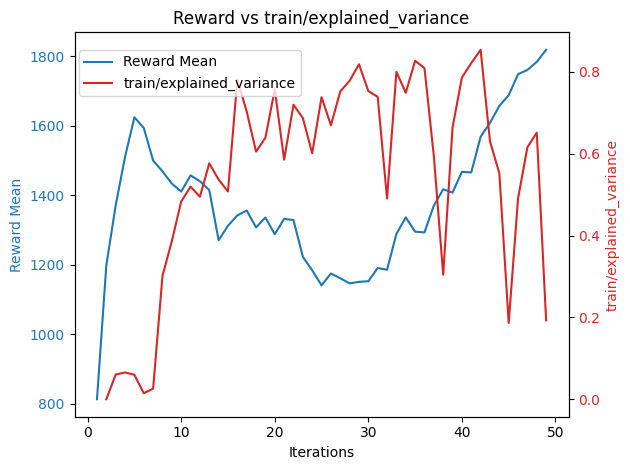

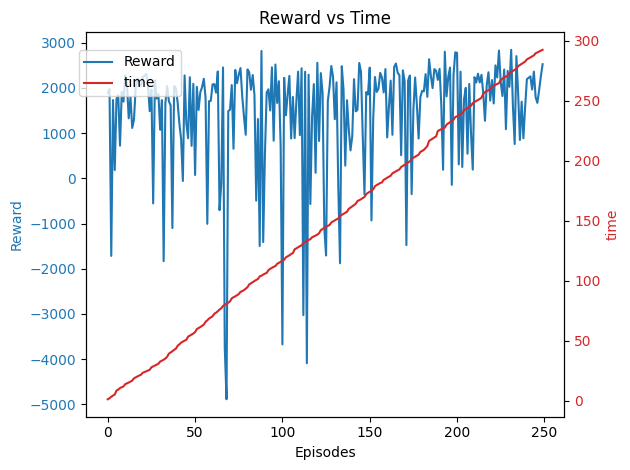

In [15]:
train_data_log: DataFrame = pd.read_csv(logs_path+"progress.csv")
train_data_monitor: DataFrame = pd.read_csv(logs_path+"monitor.csv", header=1)


print("Avaliable metrics: ", train_data_log.columns.to_list())

fig, ax1 = plt.subplots()

iterations: Series[int] = train_data_log['time/iterations'].astype(int)


ax1.set_xlabel('Iterations')
color = Color.BLUE.value
ax1.set_ylabel('Reward Mean', color=color)
ax1.plot(iterations,
         train_data_log['rollout/ep_rew_mean'], color=color, label='Reward Mean')
ax1.tick_params(axis='y', labelcolor=color)


col = 'train/explained_variance'

ax2 = ax1.twinx()
color = Color.RED.value
ax2.set_ylabel(col, color=color)
ax2.plot(iterations, train_data_log[col], color=color, label=col)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Reward vs ' + col)


fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()


fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))


ax1.set_xlabel('Episodes')
color = Color.BLUE.value
ax1.set_ylabel('Reward', color=color)
ax1.plot(episodes, train_data_monitor['r'], color=color, label='Reward')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Reward vs Time')


ax2 = ax1.twinx()
color = Color.RED.value
ax2.set_ylabel('time', color=color)
ax2.plot(episodes, train_data_monitor['t'], color=color, label='time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()

## Comprobación funcionamiento


In [16]:
seed = 289980628190634006122751570777790489191
env: RouterEnv = make(env_id, seed=seed)
seed: int = env.np_random_seed
model: PPO = PPO.load(name, print_system_info=True)

num_steps = 1
obs, _ = env.reset()
# Variables de información:

stats = []
rewards = []

# -------------------------

_states = None
ant = env._get_info()
for episode in range(num_steps):

    done = False
    step_counter = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, terminated, info = env.step(action)

        stats.append(info["Stats"])
        rewards.append(reward)

        done: bool = done or terminated

    env.reset()
    step_counter += 1

# Debug
acciones = [x["Action"] for x in stats]
calcular_stats_acciones(acciones)

print(f"Seed: {env.np_random_seed}")

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

DENY: 29.50%
ALLOW: 70.50%
Seed: 289980628190634006122751570777790489191


In [17]:
assert len(acciones) != acciones.count(
    Action.DENY), "All packets have been denied"
assert len(acciones) != acciones.count(
    Action.ALLOW), "All packets have been allowed"

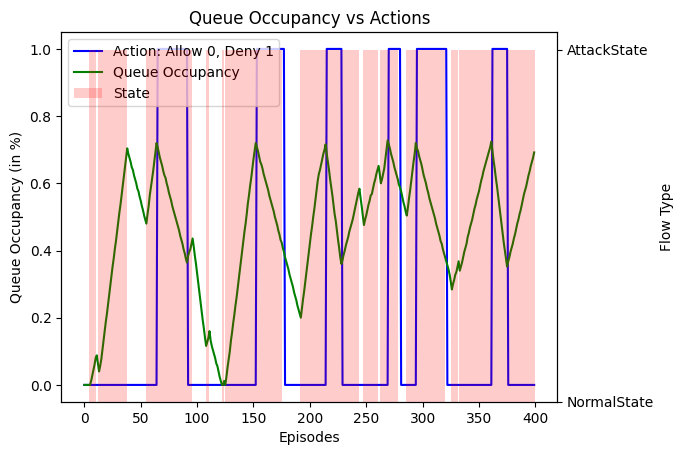

Rewards:  [8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.41, 8.29, 8.17, 8.05, 7.9, 7.84, 8.02, 8.2, 8.08, 7.93, 7.72, 7.51, 7.3, 7.09, 6.91, 6.7, 6.49, 6.28, 6.07, 5.86, 5.68, 5.47, 5.29, 5.08, 4.87, 4.66, 4.48, 4.27, 4.06, 3.85, 3.64, 3.43, 3.22, 3.34, 3.43, 3.52, 3.64, 3.7, 3.82, 3.91, 4.0, 4.12, 4.18, 4.3, 4.39, 4.51, 4.6, 4.72, 4.81, 4.9, 4.69, 4.51, 4.27, 4.09, 3.91, 3.73, 3.52, 3.31, 3.1, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, 5.62, 5.53, 5.47, 5.35, 5.23, 5.41, 5.62, 5.8, 6.01, 6.22, 6.43, 6.64, 6.85, 7.06, 7.24, 7.45, 7.63, 7.54, 7.45, 7.3, 7.51, 7.63, 7.72, 7.81, 7.9, 8.02, 8.08, 8.2, 8.32, 8.41, 8.5, 8.5, 8.41, 8.5, 8.32, 8.11, 7.93, 7.75, 7.51, 7.33, 7.12, 6.94, 6.73, 6.55, 6.34, 6.13, 5.92, 5.71, 5.5, 5.29, 5.08, 4.9, 4.69, 4.45, 4.27, 4.06, 3.88, 3.67, 3.46, 3.28, 3.1, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -

In [18]:
assert len(acciones) == len(rewards)

fig, ax1 = plt.subplots()
ocu = [x["OcupacionActual"] for x in stats]
att = 1
norm = 0
NormalState
estados: list[int] = [norm if x["EstadoMaquina"] ==
                      NormalState.__name__ else att for x in stats]

acciones: list[int] = [Action.action_to_int(x["Action"]) for x in stats]

ax1.plot(
    acciones, label=f"Action: Allow {Action.action_to_int(Action.ALLOW)}, Deny {Action.action_to_int(Action.DENY)}", color='#0000FF')
ax1.plot(ocu, label="Queue Occupancy", color='green')
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Queue Occupancy (in %)")
ax1.set_title("Queue Occupancy vs Actions")

ax2 = ax1.twinx()
ax2.bar(range(len(estados)), estados, color='red',
        label="State", alpha=0.20, width=1)
ax2.set_ylabel("Flow Type")
ax2.set_yticks([0, 1],[NormalState.__name__, AttackState.__name__])

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

plt.show()


print("Rewards: ", rewards)
calcular_stats_acciones(acciones)

Ocupación:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012, 0.028, 0.044, 0.06, 0.08, 0.088, 0.064, 0.04, 0.056, 0.076, 0.104, 0.132, 0.16, 0.188, 0.212, 0.24, 0.268, 0.296, 0.324, 0.352, 0.376, 0.404, 0.428, 0.456, 0.484, 0.512, 0.536, 0.564, 0.592, 0.62, 0.648, 0.676, 0.704, 0.688, 0.676, 0.664, 0.648, 0.64, 0.624, 0.612, 0.6, 0.584, 0.576, 0.56, 0.548, 0.532, 0.52, 0.504, 0.492, 0.48, 0.508, 0.532, 0.564, 0.588, 0.612, 0.636, 0.664, 0.692, 0.72, 0.708, 0.692, 0.676, 0.664, 0.652, 0.636, 0.624, 0.616, 0.6, 0.588, 0.572, 0.56, 0.548, 0.532, 0.52, 0.508, 0.496, 0.484, 0.472, 0.46, 0.444, 0.432, 0.42, 0.404, 0.392, 0.376, 0.364, 0.384, 0.396, 0.404, 0.42, 0.436, 0.412, 0.384, 0.36, 0.332, 0.304, 0.276, 0.248, 0.22, 0.192, 0.168, 0.14, 0.116, 0.128, 0.14, 0.16, 0.132, 0.116, 0.104, 0.092, 0.08, 0.064, 0.056, 0.04, 0.024, 0.012, 0.0, 0.0, 0.012, 0.0, 0.024, 0.052, 0.076, 0.1, 0.132, 0.156, 0.184, 0.208, 0.236, 0.26, 0.288, 0.316, 0.344, 0.372, 0.4, 0.428, 0.456, 0.48, 0.508, 0.54, 0.564, 0.592, 0.6

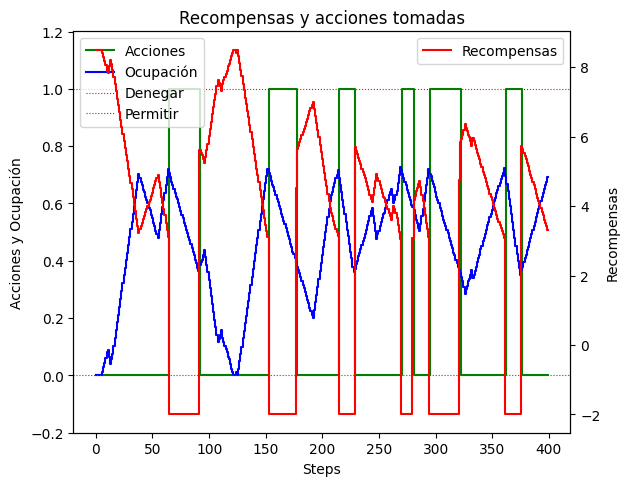

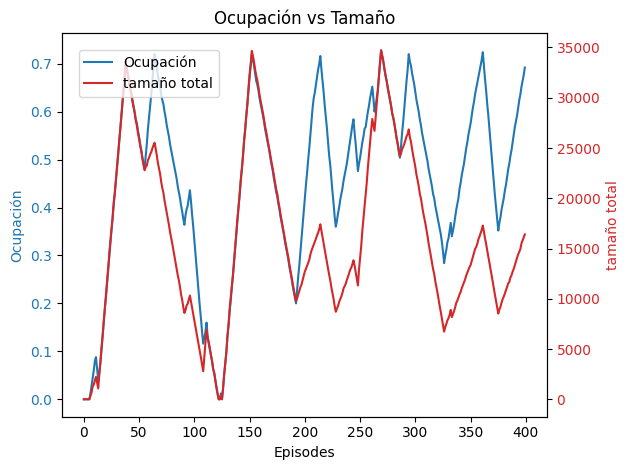

La ocupación máxima es de 73%
La ocupación mínima es de 0%


In [19]:
print("Ocupación: ", ocu)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Steps')
ax1.set_ylabel('Acciones y Ocupación')

ax1.step(range(len(acciones)), acciones,
         label="Acciones", where='post', color='green')
ax1.step(range(len(ocu)), ocu, label="Ocupación", where='mid', color='blue')


ticks = list(ax1.get_yticks())  

ax1.set_yticks(sorted(ticks)) 


ax1.axhline(y=Action.action_to_int(Action.DENY), color='red',
            linestyle='dotted', linewidth=0.8, label='Denegar')
ax1.axhline(y=Action.action_to_int(Action.ALLOW),
            color='green', linestyle='dotted', linewidth=0.8, label='Permitir')


ax1.legend(loc=Location.UPPER_LEFT.value)

ax2 = ax1.twinx()
ax2.set_ylabel('Recompensas')
ax2.step(range(len(rewards)), rewards,
         label="Recompensas", where='mid', color='r')

ax2.legend(loc=Location.UPPER_RIGHT.value)

fig.tight_layout()
plt.title("Recompensas y acciones tomadas")
plt.show()


tam = [x["TamañoTotal"] for x in stats]


fig, ax1 = plt.subplots()

train_data_monitor: DataFrame = pd.read_csv(logs_path+"monitor.csv", header=1)

episodes = range(len(train_data_monitor['l']))

ax1.set_xlabel('Episodes')
color = Color.BLUE.value
label = 'Ocupación'
ax1.set_ylabel(label, color=color)
ax1.plot(range(len(ocu)), ocu, color=color, label=label)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Ocupación vs Tamaño')


ax2 = ax1.twinx()
color = Color.RED.value
label = 'tamaño total'
ax2.set_ylabel(label, color=color)
ax2.plot(range(len(tam)), tam, color=color, label=label)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()

print(f"La ocupación máxima es de {np.max(ocu):.0%}")
print(f"La ocupación mínima es de {np.min(ocu):.0%}")